# A Series of Bets
This comes from an intersting article from  Ole Peters of the Santa Fe Institute, which warranted analysis through computation and visualization.  The results still blow my mind.  Here are the links:    

* https://www.santafe.edu/news-center/news/fix-economic-theory-changes-everything-gambles-inequality-ponzi-schemes
* https://www.nature.com/articles/s41567-019-0732-0

The bet is a simple coin flip: if coin comes up heads, then you get an additional 50% of your bet.  If the coin comes up tails, then you lose 40%.  So if you bet a dollar, then heads gives you \\$1.5 and tails give you \\$0.6.  You can repeat the game as long as you like.  

Should you take the bet?  And for how long?  

In [3]:
# imports
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

## Expectations

Let's think about this in a couple of ways.  First, think about the two parallel universes, one heads and one tails.  The outcomes of the two universes are, 1.5 and 0.6, with an average of 1.05.  

In [4]:
#list of potential outcomes
outcomes = [1.5, .6]

# calculate the average
arith_mean = sum(outcomes)/len(outcomes)
arith_mean

1.05

Definitely worth it!  But we can think about this another way, what if we get both outcomes sequentially?      

In [5]:
outcomes[0]*outcomes[1]

0.8999999999999999

Now we are losing money!  The sequential outcome per bet is the geometric mean.  

In [6]:
# calculate the geometric mean of outcomes
geo_mean = np.sqrt(np.prod(outcomes))
geo_mean

0.9486832980505138

Which is "correct"?  Let's start by simulating.  Later, we can work out the odds.  

## Simulations

We'll use the random.choice function to choose randomly among outcomes, and run simulations for a bunch of rounds for a bunch of runs and put the results in a dataframe.  

In [7]:
results = pd.DataFrame()
runs = 150
rounds = 1000

for run in range(runs):
    worth_list = []
    worth = 1
    worth_list.append(worth)
    for r in range(rounds):
        worth *= random.choice(outcomes)
        worth_list.append(worth)
    results[run] = worth_list
results.head()

0      1     2     3     4       5      6      7     8     9    ...  \
0  1.00  1.000  1.00  1.00  1.00  1.0000  1.000  1.000  1.00  1.00  ...   
1  1.50  1.500  1.50  1.50  0.60  1.5000  0.600  1.500  0.60  0.60  ...   
2  2.25  0.900  2.25  0.90  0.90  2.2500  0.900  2.250  0.90  0.90  ...   
3  1.35  1.350  1.35  0.54  1.35  3.3750  0.540  1.350  1.35  1.35  ...   
4  0.81  2.025  0.81  0.81  0.81  5.0625  0.324  2.025  0.81  0.81  ...   

     140    141    142    143    144   145    146     147   148    149  
0  1.000  1.000  1.000  1.000  1.000  1.00  1.000  1.0000  1.00  1.000  
1  1.500  0.600  1.500  0.600  1.500  1.50  0.600  1.5000  0.60  1.500  
2  2.250  0.360  0.900  0.900  0.900  2.25  0.360  2.2500  0.90  2.250  
3  1.350  0.540  1.350  0.540  0.540  1.35  0.540  3.3750  1.35  3.375  
4  2.025  0.324  2.025  0.324  0.324  0.81  0.324  5.0625  0.81  2.025  

[5 rows x 150 columns]

Let's make a couple of lists representing the expected results using the arithmetic mean and the geometric mean above for comparison.  

In [8]:
# x range
x_lim = 1000
# x values
x = np.arange(0,x_lim +1,1)
# calculate the expectation value curve (assume 1.05 return on every bet)
arith_y = arith_mean**x
# calculate the geometric mean value curve (assume 0.95 return on every bet)
geo_y = geo_mean**x
# clean up the one-off for plotting
x = x[:-1]
arith_y = arith_y[1:]
geo_y = geo_y[1:]

## Visualize the Results

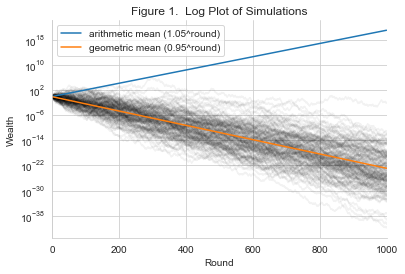

In [9]:
# plot the results- this is the same plot shown in the article
fig, ax = plt.subplots()
results.plot.line(legend = False, logy = True, color = 'black', alpha = .05, ax = ax)
plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles[-2:], labels = labels[-2:])

plt.title('Figure 1.  Log Plot of Simulations')
plt.ylabel('Wealth')
plt.xlabel('Round')

sns.despine()

This is recreating the plot in the Peters' paper.  **All** the simulations go to ~zero eventually, and geometric mean looks like the clear winner.  

However, in the short-term, do things look different?  

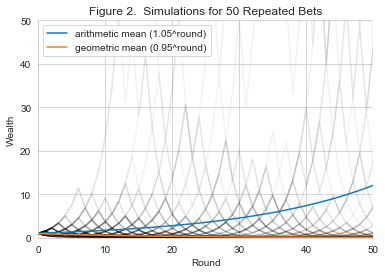

In [10]:
# plot near the origin
results.plot.line(legend = False, color = 'black', alpha = .05, ylim=(0,50), xlim = (0,50))
plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles[-2:], labels = labels[-2:])

plt.title('Figure 2.  Simulations for 50 Repeated Bets')
plt.ylabel('Wealth')
plt.xlabel('Round')
sns.set_style("whitegrid")
sns.despine()

This is a cool looking pattern, clearly some scenarios are beating the odds and others are going broke, but it is hard to understand the averages.  Let's plot the averages and confidence intervals using the seaborn package.  

C:\Users\greg\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


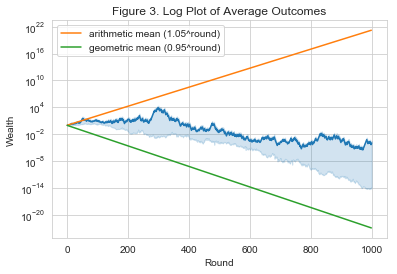

In [11]:
# plot the averages and confidence intervals
cols = results.columns
sns.lineplot(data = results.reset_index().melt(id_vars = 'index' ,value_vars = cols), 
             x='index', y='value')


plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)')
handles, labels = ax.get_legend_handles_labels()
plt.legend()

plt.title('Figure 3. Log Plot of Average Outcomes')
plt.ylabel('Wealth')
plt.xlabel('Round')
plt.yscale('log')


The average outcome is much better than the median (the geometric mean) because of the shape of the distribution. Most of the outcomes are essential zero, but high outliers drive the average up.  The blue shading is a confidence interval on the mean calculated by bootstrapping (within the seaborn plotting package).    

(0, 100)

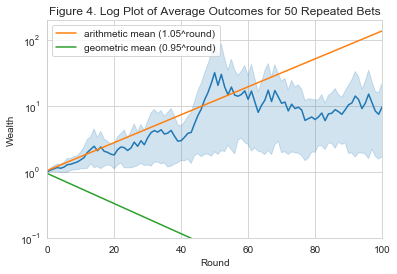

In [12]:
# plot the averages and confidence intervals
cols = results.columns
sns.lineplot(data = results.reset_index().melt(id_vars = 'index' ,value_vars = cols), 
             x='index', y='value')


plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)')

plt.legend()

plt.title('Figure 4. Log Plot of Average Outcomes for 50 Repeated Bets')
plt.ylabel('Wealth')
plt.xlabel('Round')
plt.yscale('log')
plt.ylim(0.1,200)
plt.xlim(0,100)

Interestingly, the averages do follow the arithmetic mean for a while, before plateauing off and dropping off.  I have found this pattern to be true for all runs, even though the pattern changes depending on the random seed.   

(0, 100)

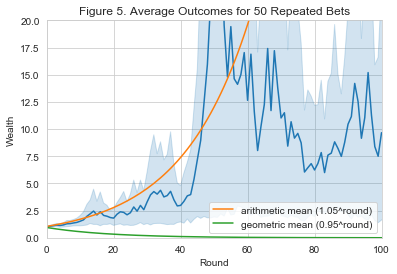

In [13]:
sns.lineplot(data = results.reset_index().melt(id_vars = 'index' ,value_vars = cols), 
             x='index', y='value')
plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)')
plt.legend()

plt.title('Figure 5. Average Outcomes for 50 Repeated Bets')
plt.ylabel('Wealth')
plt.xlabel('Round')
plt.ylim(0,20)
plt.xlim(0,100)

Another view on the same phenomenon.  

### Discussion

The major point of the Ole Peters paper on "the ergodicity problem in economics" was that the arithmetic mean model of expectation value is faulty.  In the long-run this is true for the median outcome.  However, in the short run, the average value was actually pretty close to the arithmetic mean because the very high returns for a few bets.  

So should you take the bet?  And if so, for how long?  

Let's work out the odds for a last view on the problem.  

## Binomial Distributions

Now that we have looked at the problem through simulation, let's take a look at it as a binomial distribution over time.  

In [14]:
from scipy.stats import binom

Make a binomial distribution

Text(0.5, 0, 'k (# of heads)')

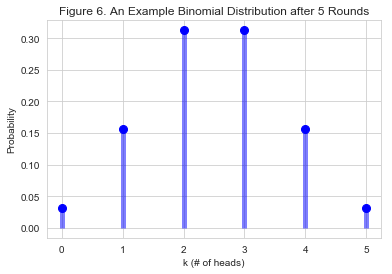

In [15]:
# try with the scipy binom function
n, p = 5, 0.5
k = np.arange(binom.ppf(0.0001, n, p),
              binom.ppf(1, n, p)+1)
fig, ax = plt.subplots(1, 1)
ax.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5)
plt.title('Figure 6. An Example Binomial Distribution after 5 Rounds')
plt.ylabel('Probability')
plt.xlabel('k (# of heads)')

The x-axis, k, is the number of times the event (i.e., heads) has occurred.  The value at location k is 1.5^k*0.6^(n-k)

In [16]:
v = (1.5**k)*(0.6**(n-k))
v

array([0.07776, 0.1944 , 0.486  , 1.215  , 3.0375 , 7.59375])

Text(0.5, 0, 'Value/ Wealth')

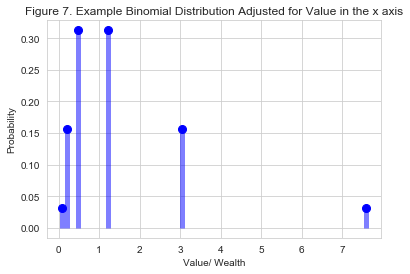

In [17]:
# plot with expected values
fig, ax = plt.subplots(1, 1)
ax.plot(v, binom.pmf(k, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(v, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5)
plt.title('Figure 7. Example Binomial Distribution Adjusted for Value in the x axis')
plt.ylabel('Probability')
plt.xlabel('Value/ Wealth')

Since it is a discrete function, the percentiles can be calculated based on the original PMF, but the average needs to be recalcuated from all the data.  

In [18]:
np.multiply(v, binom.pmf(k, n, p)).sum()

1.2762815624999997

### Loop and Plot

In [19]:
df = pd.DataFrame()
n = 5
p = 0.5

for n in range(1, 500):

    dist = binom(n,p)
    k = np.arange(binom.ppf(0.0001, n, p),
              binom.ppf(1, n, p)+1)
    v = v = (1.5**k)*(0.6**(n-k))
    
    mean = np.multiply(v, dist.pmf(k)).sum()
    pct50 = dist.median()
    pct1, pct99 = dist.interval(0.99)
    pct5, pct95 = dist.interval(0.95)
    pct10, pct90 = dist.interval(0.9)
    pct25, pct75 = dist.interval(.75)
    pcts = [pct1, pct5, pct10, pct25, pct50, pct75, pct90, pct95, pct99]

    pcts = np.vectorize(dict(zip(k,v)).get)(pcts)
    pcts

    sum_data = list(pcts)
    sum_data.append(mean)
    sum_data

    df[n] = sum_data

df = df.T
df.columns  = ['pct1', 'pct5', 'pct10', 'pct25', 'pct50', 'pct75', 'pct90', 'pct95', 'pct99', 'mean']
df.head()

pct1     pct5   pct10   pct25  pct50   pct75   pct90    pct95    pct99  \
1  0.60000  0.60000  0.6000  0.6000  0.600  1.5000  1.5000  1.50000  1.50000   
2  0.36000  0.36000  0.3600  0.3600  0.900  2.2500  2.2500  2.25000  2.25000   
3  0.21600  0.21600  0.2160  0.2160  0.540  1.3500  3.3750  3.37500  3.37500   
4  0.12960  0.12960  0.1296  0.3240  0.810  2.0250  5.0625  5.06250  5.06250   
5  0.07776  0.07776  0.1944  0.1944  0.486  3.0375  3.0375  7.59375  7.59375   

       mean  
1  1.050000  
2  1.102500  
3  1.157625  
4  1.215506  
5  1.276282

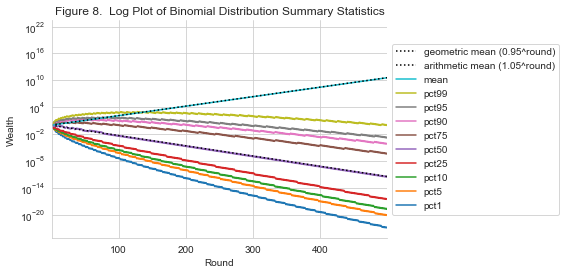

In [20]:
# plot the results
fig, ax = plt.subplots()
df.plot.line(logy = True,ax = ax)

plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)', linestyle='dotted', c='black')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)', linestyle='dotted', c = 'black')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles[::-1], labels = labels[::-1],
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Figure 8.  Log Plot of Binomial Distribution Summary Statistics')
plt.ylabel('Wealth')
plt.xlabel('Round')

sns.despine()

We have verified our results from the simulation, but also learned something about the number of rounds n.  The average outcome follows the arithmetic mean, and the median follows the geometric mean, and, contrary to the simulations, the effect goes on indefinitely.  In the simulations, we see that after 100 rounds or so the average outcome drops toward the median.  When considering the full binomial distribution, the average outcome remains high, but it is driven by a few highly unlikely, but very profitable outcomes.

Now do you take the bet, and for how long?

## I'm taking the bet  

Odds are that I will lose the dollar.  But the average is alluring.  So I think it makes sense to optimize on a percentile.  I'll maximize my winnings if I'm in the luck 10 percent.    

In [21]:
df[df.pct90==df.pct90.max()]

pct1      pct5     pct10     pct25     pct50     pct75      pct90  \
46  0.000023  0.000145  0.000363  0.002269  0.088629  3.462085  21.638033   

        pct95       pct99      mean  
46  54.095081  338.094258  9.434258

So I'll take the bet for 46 rounds.  To keep things real, I'll pick a random number seed equal to by birth month of April.  

In [24]:
random.seed(4)

rounds = 46
worth = 1
worth_list = []
worth_list.append(worth)
for r in range(rounds):
    worth *= random.choice(outcomes)
    worth_list.append(worth)
worth_list[-1]

0.014180700991443987

Bah!  Just my luck.  